In [1]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt
from deorbit.observer import Observer

# Runs in about 70s
sim = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
)



Running simulation with Two-step Adams-Bashforth integrator without noise
Ran 262728 iterations at time step of 0.1 seconds
Impacted at [ 6168983.59022696 -1591617.34648274] at velocity [-48.10422636  12.41104308] at simulated time 26272.89999989817s.
Simulation finished in 11.00204 seconds


In [2]:


obs = Observer(number_of_radars=2)
obs.states = sim.states
obs.times = sim.times

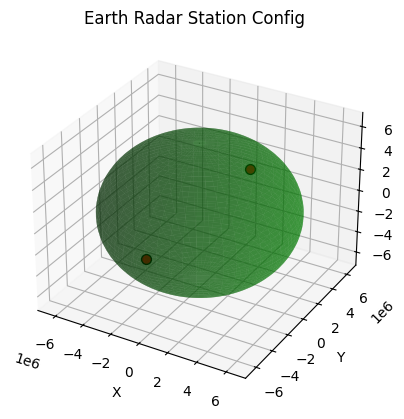

[[0.         0.        ]
 [3.14159265 0.        ]]


In [3]:
obs.plot_config()
print(obs.positions_of_radars)

[[0.         0.        ]
 [3.14159265 0.        ]]


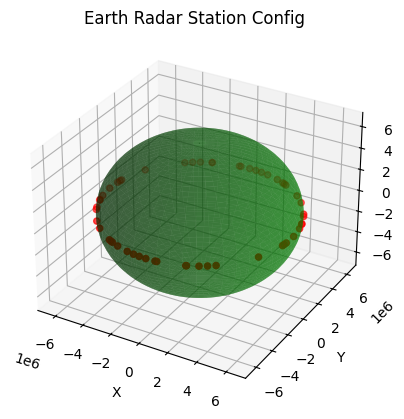

In [4]:
r = obs.radius  

theta = np.linspace(0, 2 * np.pi, 100) 
phi = np.linspace(0, np.pi, 100) 
theta, phi = np.meshgrid(theta, phi)

x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, color='g', alpha=0.5)
        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Earth Radar Station Config')

print(obs.positions_of_radars)
posy = []
for i, xi in enumerate(obs.times[::10000]):
    for radar, longlat in enumerate(obs.positions_of_radars):
                    longlat[0] = longlat[0] + obs.rotation*xi
                    x_radar, y_radar, z_radar = obs._rad_xyz(longlat)
                    posy.append([x_radar, y_radar, z_radar])
                    
posy = np.array(posy)
ax.scatter(posy[:,0], posy[:,1], posy[:,2], color='r', marker='o')

plt.show()


In [5]:
obs.run(10000)

In [6]:
print(len(obs.times))
print(len(obs.observed_times))

262730
21
